In [1]:
#Importing sufficient modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#for preparing training set and testing set
from sklearn.model_selection import train_test_split
#for craeting an object of the model
from sklearn.linear_model import LinearRegression
#for calculating different errors
from sklearn import metrics

In [2]:
#reading data
dataset = pd.read_csv('student_scores.csv')

In [3]:
#Exploring Data Set
print(dataset.shape)
print(dataset.head())
#statistical details of the dataset
print(dataset.describe())

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


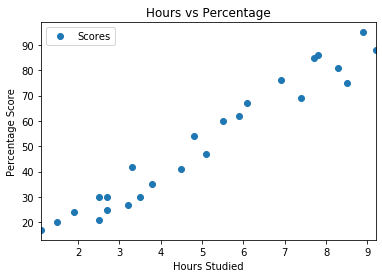

In [4]:
#visualizing data set
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [5]:
#Identify 2 continuous target variables and divide the data into "attributes" and "labels".
#Here attribute is "Hours"  and label is "Score"
#Aim: To predict the percentage score depending upon the hours studied
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [6]:
#split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#Train the algorithm
#create an instance of the class LinearRegression, which will represent the regression model:
regressor = LinearRegression()
#to start using the model
model = regressor.fit(X_train, y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [8]:
#determining the best intercept of regression line
model.intercept_

2.018160041434683

In [9]:
#determining  slope value of regression line
model.coef_

array([9.91065648])

In [11]:
#to check the goodness of fit using training set
#An unbiased estimation of the predictive performance of  model  based on test data:
model.score(X_train, y_train)

0.9515510725211553

In [12]:
##to check the goodness of fit using testing set
model.score(X_test, y_test)

0.9454906892105356

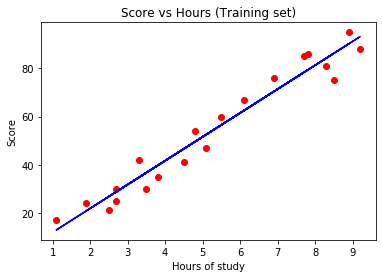

In [13]:
#visualizing the training
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Score vs Hours (Training set)')
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.show()

In [14]:
#  the regression model has to find the most optimal coefficients for all the attributes
#It results in a line that best fits the data.
#Finding the best value for the intercept and slope
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434683
[9.91065648]


In [15]:
# if a student studies one hour more than they previously studied for an exam,
#they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

In [16]:
#Making Predictions
y_pred = regressor.predict(X_test)
#y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

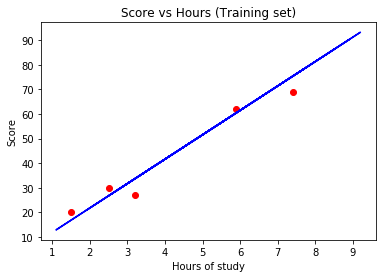

In [17]:
#Visualizing Prediction
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Score vs Hours (Training set)')
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.show()

In [18]:
#Compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


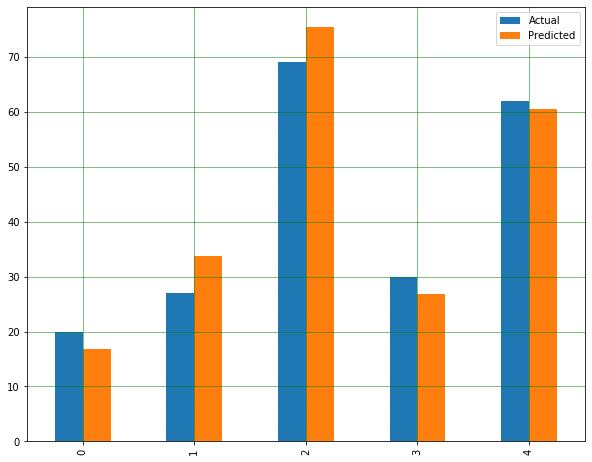

In [19]:
#Visualizing the comparison
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
#Evaluating performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
